<a href="https://colab.research.google.com/github/xxxnmxhj00/Deep-Learning/blob/main/5_5%20%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D(%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

#평균과 표준편차는 채널별로 구해줍니다 -> 표준화
x_maen = np.mean(x_train, axis=(0,1,2))
x_std = np.std(x_train, axis=(0,1,2))

#x - x.mean / x.std
x_train = (x_train - x_maen) / x_std
x_test = (x_test - x_maen) / x_std

#검증 데이터 셋 만들기
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state = 777)

y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rotation_range=30,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(x_train, y_train,
                                     batch_size=batch_size) # 배열 형태로 가져와서 flow, 32개씩 묶음을 던져줄 준비가 되고 train generator에 들어가게 된 것
val_generator = val_datagen.flow(x_val, y_val,
                                 batch_size=batch_size)


사전 학습된 모델 사용하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Activation, Input
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import VGG16

vgg16 = VGG16(weights='imagenet', input_shape=(32,32,3), include_top = False)
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 끝의 4개의 층만 동결을 해제합니다
# for layer in vgg16.layers[:-4]:
    # layer.trainable = False

모델 구성 및 학습하기

In [ ]:
model = Sequential()
model.add(Input(shape=(32,32,3)))
# vgg16 모델을 사용
model.add(vgg16)
#
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,849,610 (56.65 MB)

 Trainable params: 14,849,098 (56.64 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(train_generator,
                    epochs=20,
                    validation_data=val_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 72s 54ms/step - acc: 0.5489 - loss: 1.2960 - val_acc: 0.6893 - val_loss: 0.9210
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 60s 42ms/step - acc: 0.7218 - loss: 0.8026 - val_acc: 0.7626 - val_loss: 0.7050
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 45s 41ms/step - acc: 0.7632 - loss: 0.6829 - val_acc: 0.7747 - val_loss: 0.6607
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 44s 40ms/step - acc: 0.7909 - loss: 0.6144 - val_acc: 0.8097 - val_loss: 0.5596
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 44s 40ms/step - acc: 0.8093 - loss: 0.5607 - val_acc: 0.8205 - val_loss: 0.5344
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 46s 42ms/step - acc: 0.8255 - loss: 0.5168 - val_acc: 0.8309 - val_loss: 0.4988
Epoch 7/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 46s 42ms/step - acc: 0.8407 - loss: 0.4689 - val_acc: 0.8539 - val_loss: 0.4272
Epoch 8/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 44s 40ms/step - acc: 0.8460 - loss: 0.4434 - val_acc: 0.8343 - val_loss: 0.4849
Epoch 9/20
1094/1094 ━━━━━━━━━━━━━━

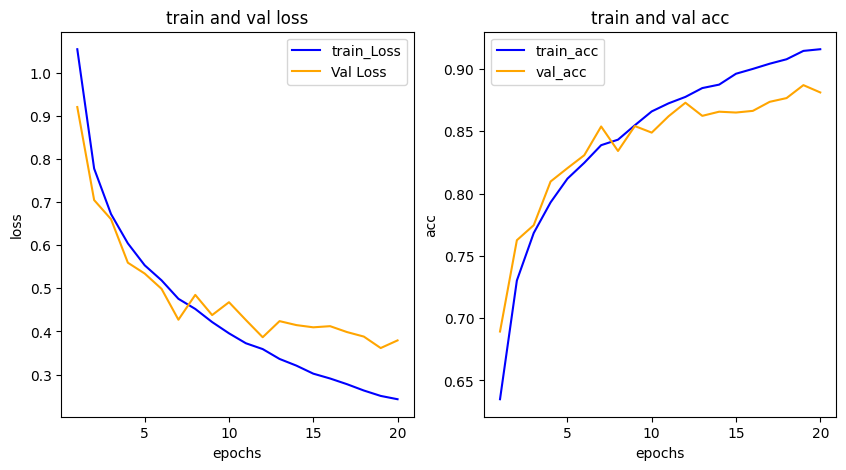

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()